In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# total_per_month = []
# for year in range (19, 22):
#     for month in range (1, 13):
#         m = str(month)
#         if month < 10:
#             m = '0' + m
#         dataset_name = "dataset/20" + str(year)+m+'-citibike-tripdata.csv'
#         df = pd.read_csv(dataset_name)
#         total_per_month.append(len(df))

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [6]:
# convert location to county
year = 19
m = '0' + str(1)
dataset_name = "dataset/20" + str(year)+m+'-citibike-tripdata.csv'
df = pd.read_csv(dataset_name)


In [27]:

i = 0
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read stations.parquet
# prepare for converting station id to county location
df_arr = []
dfstations = pd.read_parquet('stations.parquet')

def is_float(str_val):
    try:
        float(str_val)
        return True
    except ValueError:
        return False

# iterate through monthly citibike dataset

for year in range (20, 21):
    for month in range (1, 13):
        m = str(month)
        if month < 10:
            m = '0' + m
        dataset_name = "dataset/20" + str(year)+m+'-citibike-tripdata.csv'
        print(dataset_name + '\n')
        start = "start station id"
        end = "end station id"
        start_time = "starttime"
        end_time = "stoptime"

        # only use columns of start_time, start station id and end station id
        dfa = pd.read_csv(dataset_name, usecols=[start_time, start, end])

        # merge the dataframe based on the key values of start station id and end station id
        # derive the new data with station id replaced by new columns of station county information
        dfa = pd.merge(dfa, dfstations[['boro']], how = 'left', left_on= start, right_on='stationid')
        dfa = dfa.rename(columns={'boro': 'borox'}) # rename the column
        dfa = pd.merge(dfa, dfstations[['boro']], how = 'left', left_on= end, right_on='stationid')
        dfa = dfa.rename(columns={'boro': 'boroy'}) # rename the column

        df_arr.append(dfa)


dataset/202001-citibike-tripdata.csv

dataset/202002-citibike-tripdata.csv

dataset/202003-citibike-tripdata.csv

dataset/202004-citibike-tripdata.csv

dataset/202005-citibike-tripdata.csv

dataset/202006-citibike-tripdata.csv

dataset/202007-citibike-tripdata.csv

dataset/202008-citibike-tripdata.csv

dataset/202009-citibike-tripdata.csv

dataset/202010-citibike-tripdata.csv

dataset/202011-citibike-tripdata.csv

dataset/202012-citibike-tripdata.csv



In [28]:
# store in a temp variable to avoid affecting original value
df_arr1 = df_arr

# concat all the dataframes for future group
# initialize df_final as the 1st element in the array
df_final = df_arr1[0]

for i in range(1, 12):
    df_final = pd.concat([df_final, df_arr1[i]], axis = 0)

# truncate the starttime so that it only contains date information rather than combination of date and time
df_final['starttime'] = df_final['starttime'].astype(str).str.slice(stop = 10)

df_final

,starttime,start station id,end station id,borox,boroy
0,2020-01-01,504,307,Manhattan,Manhattan
1,2020-01-01,3423,3300,Brooklyn,Brooklyn
2,2020-01-01,3687,259,Manhattan,Manhattan
3,2020-01-01,346,490,Manhattan,Manhattan
4,2020-01-01,372,3637,Brooklyn,Brooklyn
...,...,...,...,...,...
1088924,2020-12-31,526,3614,Manhattan,Queens
1088925,2020-12-31,3307,3383,Manhattan,Manhattan
1088926,2020-12-31,3510,3518,Manhattan,Manhattan
1088927,2020-12-31,4073,500,Manhattan,Manhattan


In [29]:
# group the dataframe by borox and startime
grouped = df_final.groupby(['borox', 'starttime'])
count = grouped.size()

# reset index so that we can access the column with column name
count_temp = count.reset_index()

# rename the count column as name 'count'
count_temp = count_temp.rename(columns={count_temp.columns[2]: 'count'})

In [30]:
## count for boro x
county_dict_bike = {}
county_range = ["The Bronx", "Manhattan", "Richmond", "Brooklyn", "Queens"]
for index, row in count_temp.iterrows():
    county_key_x = row['borox']
    start_date = row['starttime']

    val = row['count']
    if county_key_x in county_range:
        if county_key_x not in county_dict_bike:
            county_dict_bike[county_key_x] = {}
        if start_date not in county_dict_bike[county_key_x]:
            # print(start_date)
            county_dict_bike[county_key_x][start_date] = val
        else:
            county_dict_bike[county_key_x][start_date] += val

## count for boro y
grouped_y = df_final.groupby(['boroy', 'starttime'])
count_y = grouped_y.size()

# reset index for accessing the dataframe with column names
count_temp_y = count_y.reset_index()

# rename the column containing result of count to be count
count_temp_y = count_temp.rename(columns={count_temp_y.columns[2]: 'count'})

# iterate through the count temp to gather the count information
# in dictionary with outer key equals to county name
# and inner key equals to a specific date
for index, row in count_temp_y.iterrows():
    county_key_y = row['borox']
    start_date_y = row['starttime']

    val_y = row['count']
    if county_key_y in county_range:
        if county_key_y not in county_dict_bike:
            county_dict_bike[county_key_y] = {}
        if start_date_y not in county_dict_bike[county_key_y]:
            # print(start_date)
            county_dict_bike[county_key_y][start_date_y] = val_y
        else:
            county_dict_bike[county_key_y][start_date_y] += val_y

print(county_dict_bike)

{'Brooklyn': {'2020-01-01': 7806, '2020-01-02': 13562, '2020-01-03': 10914, '2020-01-04': 12568, '2020-01-05': 12046, '2020-01-06': 13654, '2020-01-07': 14906, '2020-01-08': 13526, '2020-01-09': 12944, '2020-01-10': 17210, '2020-01-11': 25114, '2020-01-12': 23742, '2020-01-13': 16142, '2020-01-14': 14588, '2020-01-15': 17804, '2020-01-16': 14466, '2020-01-17': 11388, '2020-01-18': 6208, '2020-01-19': 11054, '2020-01-20': 9586, '2020-01-21': 12066, '2020-01-22': 13994, '2020-01-23': 15684, '2020-01-24': 17640, '2020-01-25': 8264, '2020-01-26': 15708, '2020-01-27': 15092, '2020-01-28': 15754, '2020-01-29': 15504, '2020-01-30': 14720, '2020-01-31': 16320, '2020-02-01': 15644, '2020-02-02': 12778, '2020-02-03': 17808, '2020-02-04': 17544, '2020-02-05': 16550, '2020-02-06': 10958, '2020-02-07': 11178, '2020-02-08': 14338, '2020-02-09': 14114, '2020-02-10': 8994, '2020-02-11': 12548, '2020-02-12': 16216, '2020-02-13': 12366, '2020-02-14': 12472, '2020-02-15': 9428, '2020-02-16': 12018, '2020

In [ ]:
# plot for county_dict_bike
# Define the county range
county_range = ["The Bronx", "Manhattan", "Richmond", "Brooklyn", "Queens"]

# Loop over each county in the county range
for county in county_range:
    if county in county_dict_bike:
        # Extract the start dates and counts from the dictionary
        start_dates = list(county_dict_bike[county].keys())
        counts = list(county_dict_bike[county].values())

        # Plot the data
        plt.plot(start_dates, counts, label=county)
        # rotate x_axis label by 90 degrees for better plot
        plt.xticks(rotation = 90)
        # matplotlib.rcParams['figure.figsize'] = (100, 30)
        #
        # # set font size of x_axis and y_axis
        # plt.tick_params(axis='x', labelsize=40)
        # plt.tick_params(axis='y', labelsize=40)

        # set labels
        plt.xlabel('Start Date')
        plt.ylabel('Count')
        plt.show()



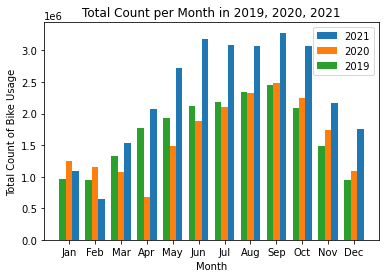

In [46]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_count = np.arange(len(months))
# plt.plot(x, y, color = 'green')
# print(y)


# bar_width = 0.25
# fig, ax = plt.subplots()
# ax.bar(monthly_count + 3*bar_width/3 , total_per_month[24:36], width = bar_width, label = '2021')
# ax.bar(monthly_count, total_per_month[12:24], width = bar_width, label = '2020')
# ax.bar(monthly_count - 3*bar_width/3, total_per_month[0:12], width = bar_width, label = '2019')
# ax.set_xticks(monthly_count)
# ax.set_xticklabels(months)
# ax.set_xlabel('Month')
# ax.set_ylabel('Total Count of Bike Usage')
# ax.set_title('Total Count per Month in 2019, 2020, 2021')
# ax.legend()

# Show the plot
# plt.show()

# plt.figure(figsize=(20,6))
# plt.bar(monthly_count, y, color = 'yellow')
# plt.bar(monthly_count, total_per_month[12:24], color = 'red')
# # plt.bar(monthly_count, total_per_month[24:35], color = 'green')
# plt.xticks(rotation=30, horizontalalignment="center")
# plt.xlabel("Month")
# plt.ylabel("Number of infected")
# plt.title("Infected per month")

In [8]:
df_covid = pd.read_csv("New_York_State_Statewide_COVID-19_Testing.csv")

In [9]:
covid_dict = {}

county_dict = {}
county_range = ["Bronx", "New York", "Richmond", "Kings", "Queens"]

for index, row in df_covid.iterrows():
    county = row['County']
    if county in county_range:
        if county not in county_dict:
            county_dict[county] = {'test_dates': [], 'new_positives': []}
        county_dict[county]['test_dates'].append(row['Test Date'])
        county_dict[county]['new_positives'].append(row['New Positives'])



In [ ]:
# graph of covid cases versus county versus specific date
# county_dict has key of county
# then with key county, values are two arrays, one of them is test_dates and the other one is new_positives
# each value in test_dates correspond to a value in new_positives
plt.plot(county_dict["Bronx"]['test_dates'],county_dict["Bronx"]['new_positives'])
plt.xlabel('Test Date')

# set font size of x_axis and y_axis
plt.tick_params(axis='x', labelsize=40)
plt.tick_params(axis='y', labelsize=40)
plt.ylabel('New Positives')

plt.title('Bronx')
# invert x axis because the original order of x_axis is from 2023 to 2019
plt.gca().invert_xaxis()

# rotate x_axis label by 90 degrees for better plot
plt.xticks(county_dict["Bronx"]['test_dates'][::30], rotation=90)
matplotlib.rcParams['figure.figsize'] = (100, 30)
plt.show()

In [12]:
county_dict["Bronx"]["test_dates"]

['05/05/2023',
 '05/04/2023',
 '05/03/2023',
 '05/02/2023',
 '05/01/2023',
 '04/30/2023',
 '04/29/2023',
 '04/28/2023',
 '04/27/2023',
 '04/26/2023',
 '04/25/2023',
 '04/24/2023',
 '04/23/2023',
 '04/22/2023',
 '04/21/2023',
 '04/20/2023',
 '04/19/2023',
 '04/18/2023',
 '04/17/2023',
 '04/16/2023',
 '04/15/2023',
 '04/14/2023',
 '04/13/2023',
 '04/12/2023',
 '04/11/2023',
 '04/10/2023',
 '04/09/2023',
 '04/08/2023',
 '04/07/2023',
 '04/06/2023',
 '04/05/2023',
 '04/04/2023',
 '04/03/2023',
 '04/02/2023',
 '04/01/2023',
 '03/31/2023',
 '03/30/2023',
 '03/29/2023',
 '03/28/2023',
 '03/27/2023',
 '03/26/2023',
 '03/25/2023',
 '03/24/2023',
 '03/23/2023',
 '03/22/2023',
 '03/21/2023',
 '03/20/2023',
 '03/19/2023',
 '03/18/2023',
 '03/17/2023',
 '03/16/2023',
 '03/15/2023',
 '03/14/2023',
 '03/13/2023',
 '03/12/2023',
 '03/11/2023',
 '03/10/2023',
 '03/09/2023',
 '03/08/2023',
 '03/07/2023',
 '03/06/2023',
 '03/05/2023',
 '03/04/2023',
 '03/03/2023',
 '03/02/2023',
 '03/01/2023',
 '02/28/20

In [34]:
# correlation = np.corrcoef(counts, covid_counts[365:731])[0,1]
# print("Correlation in 2020 between Covid and Citibike is:", correlation)




Correlation in 2020 between Covid and Citibike is: -0.1514087843262454


Correlation in 2020 between Weather and Citibike in The Bronx is:  0.4711681112967417


C:\Users\Xiong\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Xiong\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


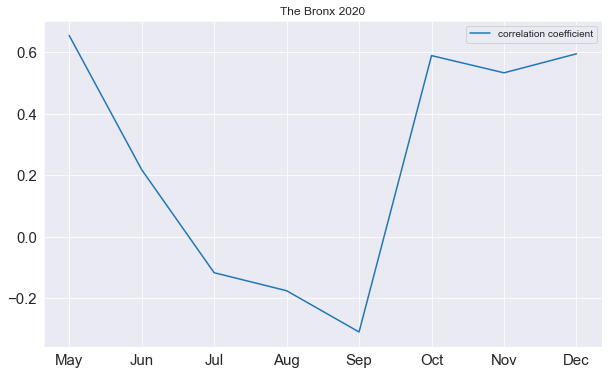

Correlation in 2020 between Weather and Citibike in Manhattan is:  0.6523445365132142


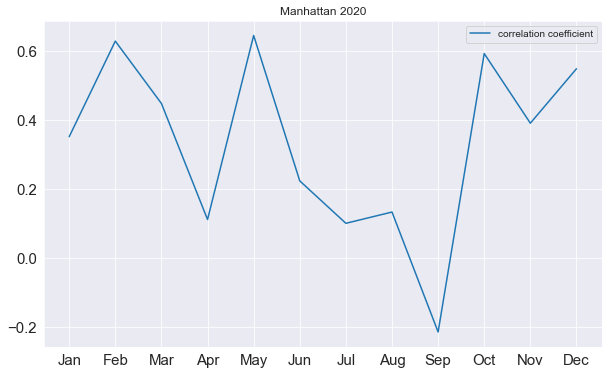

Correlation in 2020 between Weather and Citibike in Brooklyn is:  0.7066096870850764


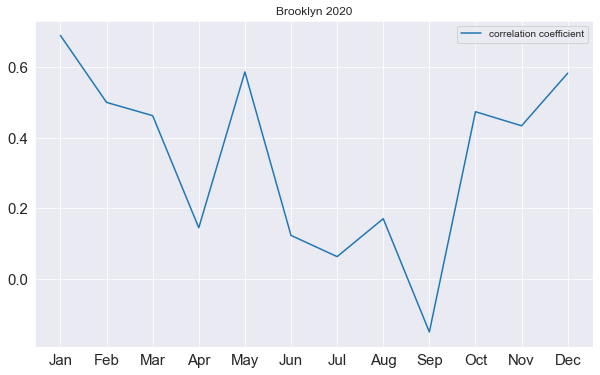

Correlation in 2020 between Weather and Citibike in Queens is:  0.8044273236139013


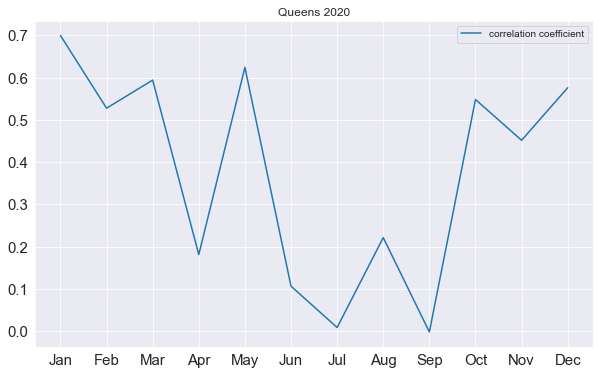

In [109]:
# calculate for correlation between weather and bike date

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('nyc 2020 weather.csv')

# Access the "TEMP" column and store it in an array
temp_date = df['DATE'].values
temp_array = df['TEMP'].values

# average temperature for 10/05/2020 is missed from the csv
# take average of 10/04 and 10/06 and insert to the array
predict_temp = (61.6 + 64.3) / 2
temp_array = np.insert(temp_array, 278, predict_temp)

county_range_bike = ["The Bronx", "Manhattan", "Brooklyn", "Queens"]

for j in range(len(county_range_bike)):
    # store correponding county monthly count inside array
    start_dates = list(county_dict_bike[county_range_bike[j]].keys())
    bike_counts = list(county_dict_bike[county_range_bike[j]].values())

    correlation = np.corrcoef(temp_array, bike_counts)[0,1]
    print("Correlation in 2020 between Weather and Citibike in " + county_range_bike[j] + " is: ", correlation)

    # start_dates has date format of 2019-08-01
    # start_dates[0][5:7] record the current month
    cur_year = start_dates[0][0:4]
    cur_month = start_dates[0][5:7]
    # print(cur_year,cur_month)
    covid_arr = []
    bike_arr = []
    col_arr = []

    # start_dates format 2019-08-01
    for i in range(len(start_dates)):
        if start_dates[i][5:7] != cur_month:
            # when encountering a new month, perform action
            # calculate correlation
            col_arr.append(np.corrcoef(covid_arr, bike_arr)[0,1])
            cur_month = start_dates[i][5:7]
            # empty the list
            covid_arr = []
            bike_arr = []
        covid_arr.append(temp_array[i])
        bike_arr.append(bike_counts[i])
    # if not a new month, append to the list
    # if a new month, append to the new list
    # [0,1] refers to a specific coefficient we want inside the given correlation matrix
    col_arr.append(np.corrcoef(covid_arr, bike_arr)[0,1])
    cur_month = start_dates[i][5:7]

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # monthly_count = np.arange(len(months))
    plt.figure(figsize=(10,6))
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    plt.title(county_range_bike[j] + " " + cur_year)
    plt.plot(months, col_arr, label ="correlation coefficient")
    plt.legend()
    plt.show()

# calculate yearly correlation coefficient


Correlation in 2020 between Covid and Citibike in The Bronx is:  -0.4558668519213263


C:\Users\Xiong\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Xiong\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


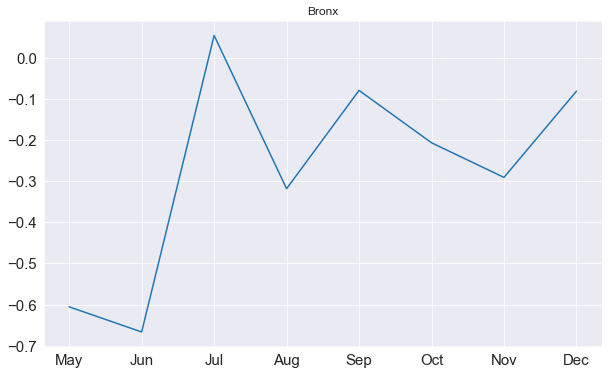

Correlation in 2020 between Covid and Citibike in Manhattan is:  -0.6212618815188573


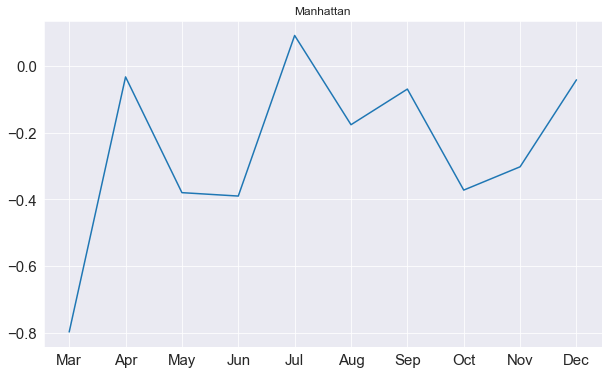

Correlation in 2020 between Covid and Citibike in Brooklyn is:  -0.636023438191141


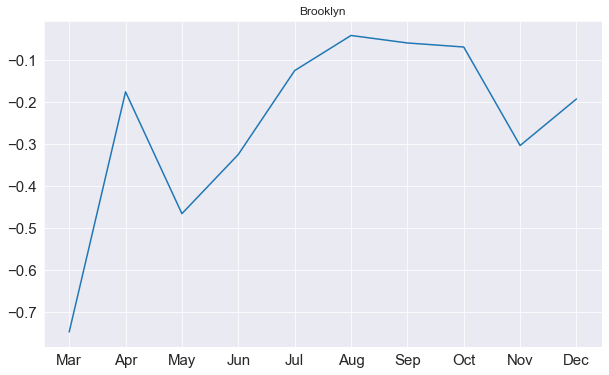

Correlation in 2020 between Covid and Citibike in Queens is:  -0.6613740751020499


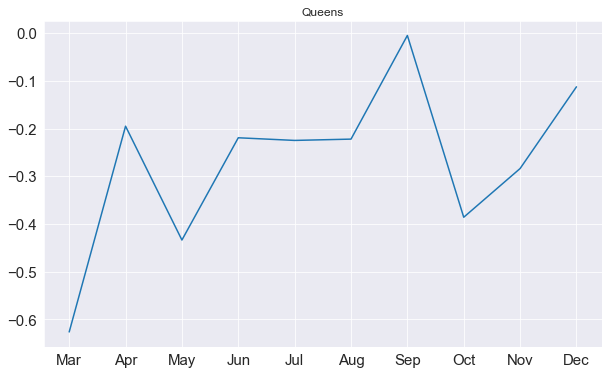

In [227]:
# calculate for correlation between weather and bike date
county_range_bike = ["The Bronx", "Manhattan", "Richmond", "Brooklyn", "Queens"]
county_range_covid = ["Bronx", "New York", "Richmond", "Kings", "Queens"]
county_range_title = ["Bronx", "Manhattan", "Staten Island", "Brooklyn", "Queens"]

for j in range(len(county_range_covid)):
    try:
        # store correponding county monthly count inside array
        start_dates_covid = list(county_dict[county_range_covid[j]]['test_dates'])
        covid_counts = list(county_dict[county_range_covid[j]]['new_positives'])
        start_dates = list(county_dict_bike[county_range_bike[j]].keys())
        bike_counts = list(county_dict_bike[county_range_bike[j]].values())

        # reverse the data of covid so that it is in chronological order
        start_dates_covid.reverse()
        covid_counts.reverse()

        # covid data starts from 03/01, truncate bike correspondingly
        bike_counts = bike_counts[60:]

        # start_dates has date format of 2019-08-01
        # start_dates[0][5:7] record the current month
        cur_year = start_dates[0][0:4]
        cur_month = start_dates[0][5:7]
        # print(cur_year,cur_month)
        covid_arr = []
        bike_arr = []
        col_arr = []

        correlation = np.corrcoef(covid_counts[0:366-60], bike_counts)[0,1]
        print("Correlation in 2020 between Covid and Citibike in " + county_range_bike[j] + " is: ", correlation)

    # start_dates format 2019-08-01
        for i in range(len(start_dates) - 61):
            if start_dates[i][5:7] != cur_month:
                # when encountering a new month, perform action
                # calculate correlation
                col_arr.append(np.corrcoef(covid_arr, bike_arr)[0,1])
                cur_month = start_dates[i][5:7]
                # empty the list
                covid_arr = []
                bike_arr = []
            covid_arr.append(covid_counts[i])
            bike_arr.append(bike_counts[i])
        # if not a new month, append to the list
        # if a new month, append to the new list
        # [0,1] refers to a specific coefficient we want inside the given correlation matrix
        col_arr.append(np.corrcoef(covid_arr, bike_arr)[0,1])
        cur_month = start_dates[i][5:7]

        months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        # monthly_count = np.arange(len(months))
        plt.figure(figsize=(10,6))
        plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=15)
        plt.title(county_range_title[j])
        plt.plot(months, col_arr)
        plt.show()
    except KeyError:
        continue


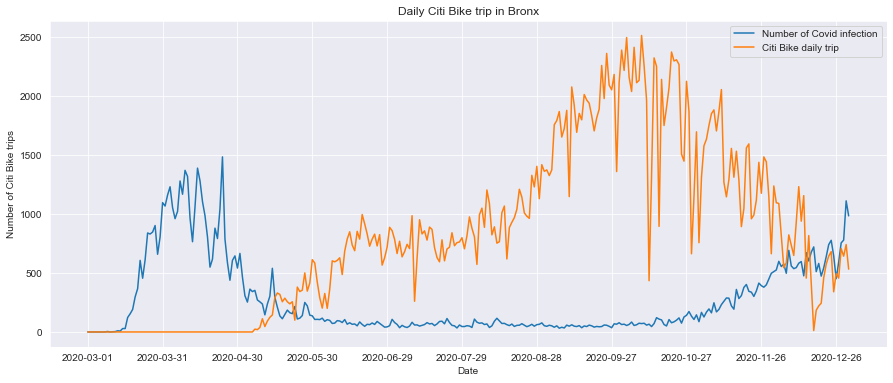

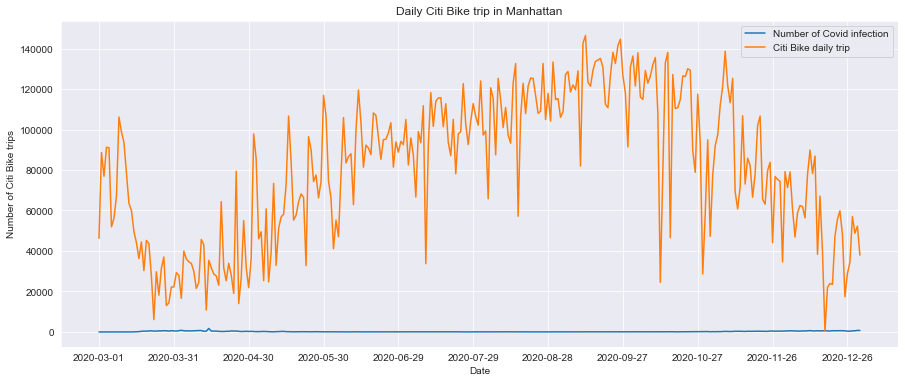

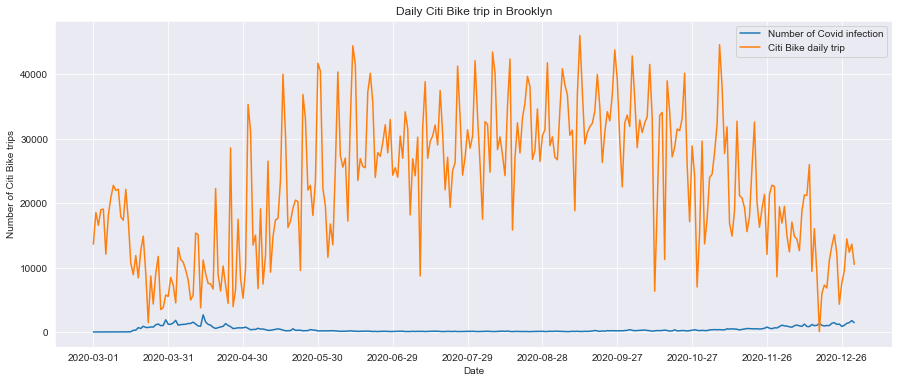

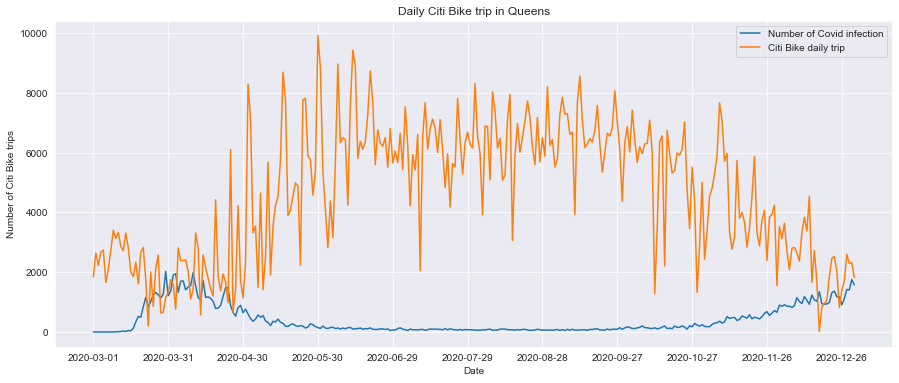

In [240]:
county_range_bike = ["The Bronx", "Manhattan", "Richmond", "Brooklyn", "Queens"]
county_range_covid = ["Bronx", "New York", "Richmond", "Kings", "Queens"]
county_range_title = ["Bronx", "Manhattan", "Staten Island", "Brooklyn", "Queens"]


# draw graph of covid versus bike yearly
for j in range(len(county_range_covid)):
    try:
        # store correponding county monthly count inside array
        start_dates_covid = list(county_dict[county_range_covid[j]]['test_dates'])
        covid_counts = list(county_dict[county_range_covid[j]]['new_positives'])
        start_dates = list(county_dict_bike[county_range_bike[j]].keys())
        bike_counts = list(county_dict_bike[county_range_bike[j]].values())

        # reverse the data of covid so that it is in chronological order
        start_dates_covid.reverse()
        covid_counts.reverse()

        # covid data starts from 03/01, truncate bike correspondingly
        bike_counts = bike_counts[60:]

        # draw graph of county in 2020 of bike versus covid
        # draw graph
        # fig, ax = plt.subplots(figsize=(30,10))
        # ax.plot(start_dates[60:], covid_counts[:366 - 60], label='Covid Graph')
        # # plot the second graph
        # ax.plot(start_dates[60:], bike_counts, label='Bike Graph')
        # ax.set_xticks(start_dates[60:][::30])
        # plt.tick_params(axis='x', labelsize=15)
        # plt.tick_params(axis='y', labelsize=15)
        # plt.title(county_range_title[j])
        # plt.show()
        #

        plt.figure(figsize=(15,6))
        plt.plot(start_dates[60:], covid_counts[:366 - 60], label = "Number of Covid infection")
        plt.plot(start_dates[60:], bike_counts, label = "Citi Bike daily trip")
        plt.xticks(start_dates[60:][::30], rotation=0, horizontalalignment="center")
        plt.xlabel("Date")
        plt.ylabel("Number of Citi Bike trips")
        plt.title("Daily Citi Bike trip in "+county_range_title[j])
        plt.legend()
        plt.show()

    except KeyError:
        continue

In [243]:
def calculate_granger_causation_matrix(data, variables, max_lag, test='ssr_chi2test'):
    num_vars = len(variables)
    matrix = pd.DataFrame(np.zeros((num_vars, num_vars)), columns=variables, index=variables)

    for i, causing_var in enumerate(variables):
        for j, caused_var in enumerate(variables):
            # perform grangercausalitytests on the given dataframes
            test_results = grangercausalitytests(data[[caused_var, causing_var]], max_lag, verbose=False)

            # derive the array of p with given lag values
            lag_values = [round(test_results[k + 1][0][test][1], 4) for k in range(max_lag)]

            # find the minimum p value
            min_p_value = np.min(lag_values)
            matrix.iloc[j, i] = f"{min_p_value:.6g}"

    # create a matrix of p_values for future analysis
    matrix.columns = [var + '_cause' for var in variables]
    matrix.index = [var + '_effect' for var in variables]
    return matrix

def find_min_lag(df):
    aic, bic= [], []
    model = VAR(df)
    arr = np.arange(1,50)
    # fit VAR model with the preset range of lag values
    for i in arr:
        result = model.fit(i)
        aic.append(result.aic)
        bic.append(result.bic)
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

    # plot the graph for AIC and BIC to present the comparison of the lowest point for AIC and BIC (optimal lag value)
    ax[0].plot(arr, aic, label='AIC',marker='o')
    # plot the second graph
    ax[1].plot(arr, bic, label='BIC',marker='o')
    # ax.set_title("AIC vs BIC")
    ax[0].set_title('AIC')
    ax[1].set_title('BIC')

    # the argmin would return the index
    # index = lag value - 1
    return (np.argmin(aic) + 1, np.argmin(bic) + 1)

County: Bronx
             covid_cause bike_cause
covid_effect           1     0.2953
bike_effect        0.016          1


County: Manhattan
             covid_cause bike_cause
covid_effect           1          0
bike_effect            0          1


County: Brooklyn
             covid_cause bike_cause
covid_effect           1          0
bike_effect            0          1


County: Queens
             covid_cause bike_cause
covid_effect           1     0.0017
bike_effect            0          1




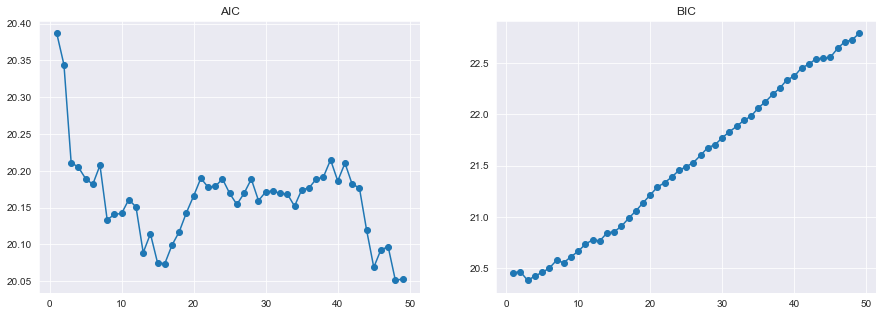

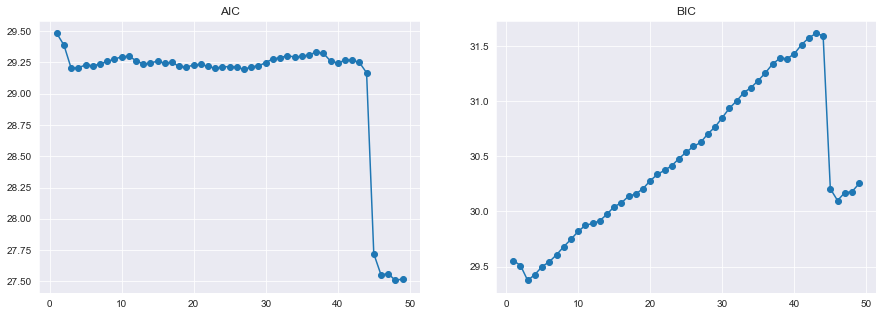

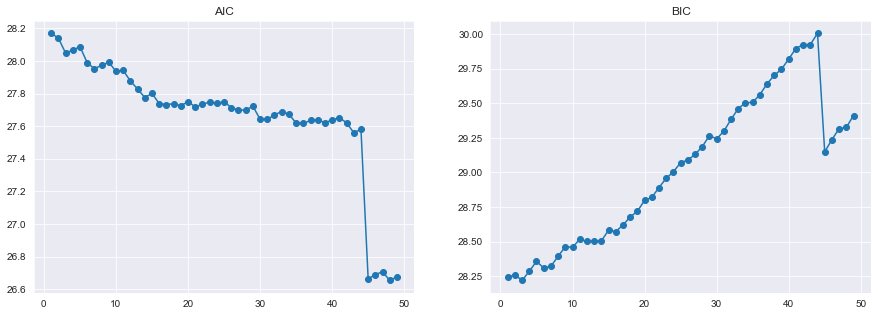

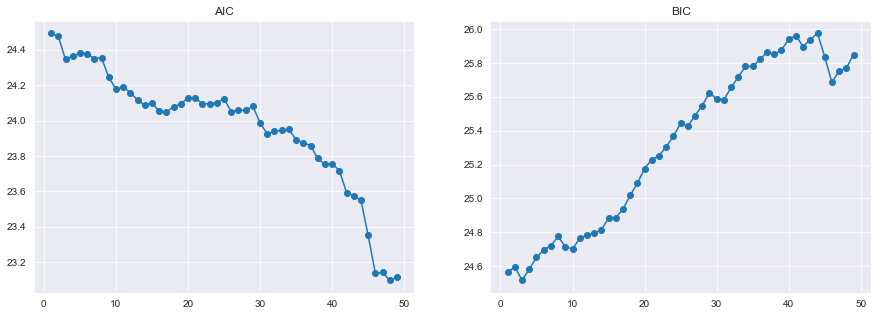

In [244]:
# calculate for granger causality regarding covid and bike
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR


county_range_bike = ["The Bronx", "Manhattan", "Richmond", "Brooklyn", "Queens"]
county_range_covid = ["Bronx", "New York", "Richmond", "Kings", "Queens"]
county_range_title = ["Bronx", "Manhattan", "Staten Island", "Brooklyn", "Queens"]

for j in range(len(county_range_covid)):
    try:
        # store correspond to county monthly count inside array
        start_dates_covid = list(county_dict[county_range_covid[j]]['test_dates'])
        covid_counts = list(county_dict[county_range_covid[j]]['new_positives'])
        start_dates = list(county_dict_bike[county_range_bike[j]].keys())
        bike_counts = list(county_dict_bike[county_range_bike[j]].values())

        # reverse the data of covid so that it is in chronological order
        start_dates_covid.reverse()
        covid_counts.reverse()

        covid_arr = []
        bike_arr = []
        col_arr = []

        print("County: " + county_range_title[j])
        # only for year 2020
        covid_arr = covid_counts[0:366-60]
        bike_arr = bike_counts[60:]
        # Convert the data into a DataFrame
        df = pd.DataFrame({'covid': covid_arr, 'bike': bike_arr})

        # select optimal lag values
        min_p = np.min(find_min_lag(df))
        print(min_p)
        # perform granger analysis

        print(calculate_granger_causation_matrix(df, df.columns, min_p))
        print("\n")
    except KeyError:
        continue
